# Spaceship Titanic - Training

## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import graphviz


from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

sns.set_style('darkgrid')

pd.set_option('display.max_columns', 25)


## Importação dos dados

In [2]:
spaceship = pd.read_csv('Datasets/spaceship_titanic_train.csv')
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Funções

In [3]:
def acuracia_modelo(algoritmo):
    
    modelo = algoritmo()
    modelo.fit(train_x,train_y)
    previsoes = modelo.predict(test_x)

    acuracia = accuracy_score(test_y, previsoes).round(3) * 100
    return acuracia

def tabela_freq(df,variavel):
    
    df_freq = df.loc[:,[variavel]].value_counts().to_frame('freq').reset_index()
    df_percent = (df.loc[:,[variavel]].value_counts(normalize=True).to_frame('percent').round(3)*100).reset_index()
    df_freq_percent = pd.merge(df_freq,df_percent)
    return df_freq_percent

# Análise exploratória

In [98]:
spaceship_analise = spaceship.copy()

In [46]:
spaceship_analise.shape

(8693, 14)

In [47]:
# Verificar duplicatadas
spaceship_analise.duplicated().sum()

0

In [48]:
# Verificar valores nulos
spaceship_analise.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [49]:
#Percentual de valores nulos totais
spaceship_analise.isna().sum().sum()/len(spaceship_analise)*100


26.73415391694467

In [53]:
spaceship_analise.Transported.value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [81]:
for coluna in spaceship_analise.columns[1:-1]:
    print('\n',coluna)
    print('Sem valor nulo')
    print(round(spaceship_analise[spaceship_analise[coluna].isna()].Transported.value_counts(normalize=True),3).reset_index())
    print('\nCom valor nulo')
    print(round(spaceship_analise.Transported.value_counts(normalize=True),3).reset_index())
    print(21*'-')


 HomePlanet
Sem valor nulo
   index  Transported
0   True        0.512
1  False        0.488

Com valor nulo
   index  Transported
0   True        0.504
1  False        0.496
---------------------

 CryoSleep
Sem valor nulo
   index  Transported
0  False        0.512
1   True        0.488

Com valor nulo
   index  Transported
0   True        0.504
1  False        0.496
---------------------

 Cabin
Sem valor nulo
   index  Transported
0   True        0.503
1  False        0.497

Com valor nulo
   index  Transported
0   True        0.504
1  False        0.496
---------------------

 Destination
Sem valor nulo
   index  Transported
0   True        0.505
1  False        0.495

Com valor nulo
   index  Transported
0   True        0.504
1  False        0.496
---------------------

 Age
Sem valor nulo
   index  Transported
0   True        0.503
1  False        0.497

Com valor nulo
   index  Transported
0   True        0.504
1  False        0.496
---------------------

 VIP
Sem valor nulo
 

In [82]:
# Percentual de sim e não no conjunto de dados
tabela_freq(spaceship_analise,'Transported')

,Transported,freq,percent
0,True,4378,50.4
1,False,4315,49.6


In [102]:
tabela_freq(spaceship_analise,'PassengerId')

,PassengerId,freq,percent
0,0001_01,1,0.0
1,6136_01,1,0.0
2,6141_01,1,0.0
3,6139_06,1,0.0
4,6139_05,1,0.0
...,...,...,...
8688,3126_01,1,0.0
8689,3124_03,1,0.0
8690,3124_02,1,0.0
8691,3124_01,1,0.0


In [111]:
passenger_id = spaceship_analise['PassengerId'].str.split('_',expand=True)
passenger_id.columns = ['id_passageiro','id_grupo']

In [109]:
tabela_freq(passenger_id,'id_passageiro')

,id_1,freq,percent
0,4498,8,0.1
1,8168,8,0.1
2,8728,8,0.1
3,8796,8,0.1
4,8956,8,0.1
...,...,...,...
6212,3483,1,0.0
6213,3480,1,0.0
6214,3478,1,0.0
6215,3473,1,0.0


In [112]:
tabela_freq(passenger_id,'id_grupo')

,id_grupo,freq,percent
0,01,6217,71.5
1,02,1412,16.2
2,03,571,6.6
3,04,231,2.7
4,05,128,1.5
5,06,75,0.9
6,07,46,0.5
7,08,13,0.1


In [83]:
tabela_freq(spaceship_analise,'HomePlanet')

,HomePlanet,freq,percent
0,Earth,4602,54.2
1,Europa,2131,25.1
2,Mars,1759,20.7


In [84]:
tabela_freq(spaceship_analise,'CryoSleep')

,CryoSleep,freq,percent
0,False,5439,64.2
1,True,3037,35.8


In [86]:
tabela_freq(spaceship_analise,'Cabin')

,Cabin,freq,percent
0,G/734/S,8,0.1
1,C/21/P,7,0.1
2,G/1368/P,7,0.1
3,B/82/S,7,0.1
4,G/981/S,7,0.1
...,...,...,...
6555,F/1245/P,1,0.0
6556,F/1244/S,1,0.0
6557,F/1243/S,1,0.0
6558,F/1243/P,1,0.0


In [117]:
Cabin = spaceship_analise['Cabin'].str.split('/',expand=True)
Cabin.columns = ['deck','num','side']

In [120]:
tabela_freq(Cabin,'deck')

,deck,freq,percent
0,F,2794,32.9
1,G,2559,30.1
2,E,876,10.3
3,B,779,9.2
4,C,747,8.8
5,D,478,5.6
6,A,256,3.0
7,T,5,0.1


In [121]:
tabela_freq(Cabin,'num')

,num,freq,percent
0,82,28,0.3
1,86,22,0.3
2,19,22,0.3
3,176,21,0.2
4,97,21,0.2
...,...,...,...
1812,1685,1,0.0
1813,639,1,0.0
1814,1082,1,0.0
1815,1689,1,0.0


In [122]:
tabela_freq(Cabin,'side')

,side,freq,percent
0,S,4288,50.5
1,P,4206,49.5


In [88]:
tabela_freq(spaceship_analise,'Destination')

,Destination,freq,percent
0,TRAPPIST-1e,5915,69.5
1,55 Cancri e,1800,21.1
2,PSO J318.5-22,796,9.4


In [89]:
tabela_freq(spaceship_analise,'Age')

,Age,freq,percent
0,24.0,324,3.8
1,18.0,320,3.8
2,21.0,311,3.7
3,19.0,293,3.4
4,23.0,292,3.4
...,...,...,...
75,75.0,4,0.0
76,78.0,3,0.0
77,79.0,3,0.0
78,76.0,2,0.0


# TRANSFORMAR EM CATEGÓRICO

In [90]:
tabela_freq(spaceship_analise,'VIP')

,VIP,freq,percent
0,False,8291,97.7
1,True,199,2.3


In [91]:
tabela_freq(spaceship_analise,'RoomService')

,RoomService,freq,percent
0,0.0,5577,65.5
1,1.0,117,1.4
2,2.0,79,0.9
3,3.0,61,0.7
4,4.0,47,0.6
...,...,...,...
1268,902.0,1,0.0
1269,903.0,1,0.0
1270,906.0,1,0.0
1271,909.0,1,0.0


In [92]:
tabela_freq(spaceship_analise,'FoodCourt')

,FoodCourt,freq,percent
0,0.0,5456,64.1
1,1.0,116,1.4
2,2.0,75,0.9
3,3.0,53,0.6
4,4.0,53,0.6
...,...,...,...
1502,1314.0,1,0.0
1503,1319.0,1,0.0
1504,1320.0,1,0.0
1505,1327.0,1,0.0


In [93]:
tabela_freq(spaceship_analise,'ShoppingMall')

,ShoppingMall,freq,percent
0,0.0,5587,65.8
1,1.0,153,1.8
2,2.0,80,0.9
3,3.0,59,0.7
4,4.0,45,0.5
...,...,...,...
1110,741.0,1,0.0
1111,742.0,1,0.0
1112,745.0,1,0.0
1113,746.0,1,0.0


In [94]:
tabela_freq(spaceship_analise,'Spa')

,Spa,freq,percent
0,0.0,5324,62.6
1,1.0,146,1.7
2,2.0,105,1.2
3,3.0,53,0.6
4,5.0,53,0.6
...,...,...,...
1322,1012.0,1,0.0
1323,1013.0,1,0.0
1324,1019.0,1,0.0
1325,1027.0,1,0.0


In [95]:
tabela_freq(spaceship_analise,'VRDeck')

,VRDeck,freq,percent
0,0.0,5495,64.6
1,1.0,139,1.6
2,2.0,70,0.8
3,3.0,56,0.7
4,5.0,51,0.6
...,...,...,...
1301,952.0,1,0.0
1302,954.0,1,0.0
1303,956.0,1,0.0
1304,957.0,1,0.0


In [96]:
tabela_freq(spaceship_analise,'Name')

,Name,freq,percent
0,Keitha Josey,2,0.0
1,Juane Popelazquez,2,0.0
2,Elaney Webstephrey,2,0.0
3,Apix Wala,2,0.0
4,Glenna Valezaley,2,0.0
...,...,...,...
8468,Eriey Bartez,1,0.0
8469,Erie Woodwinez,1,0.0
8470,Erie Sextones,1,0.0
8471,Erie Rilley,1,0.0


In [87]:
spaceship_analise

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [14]:
tabela_freq(spaceship_analise,'Cabin')

,Cabin,freq,percent
0,0,199,2.3
1,G/734/S,8,0.1
2,D/176/S,7,0.1
3,F/1194/P,7,0.1
4,C/21/P,7,0.1
...,...,...,...
6556,F/1245/P,1,0.0
6557,F/1244/S,1,0.0
6558,F/1243/S,1,0.0
6559,F/1243/P,1,0.0


In [15]:
tabela_freq(spaceship_analise,'Destination')

,Destination,freq,percent
0,TRAPPIST-1e,5915,68.0
1,55 Cancri e,1800,20.7
2,PSO J318.5-22,796,9.2
3,0,182,2.1


In [16]:
tabela_freq(spaceship_analise,'VIP')

,VIP,freq,percent
0,False,8494,97.7
1,True,199,2.3


In [17]:
tabela_freq(spaceship_analise,'Name')

,Name,freq,percent
0,0,200,2.3
1,Ankalik Nateansive,2,0.0
2,Gollux Reedall,2,0.0
3,Anton Woody,2,0.0
4,Asch Stradick,2,0.0
...,...,...,...
8469,Erie Woodwinez,1,0.0
8470,Erie Sextones,1,0.0
8471,Erie Rilley,1,0.0
8472,Erie Potters,1,0.0


In [18]:
variaveis_numericas = spaceship_analise[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
variaveis_numericas.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

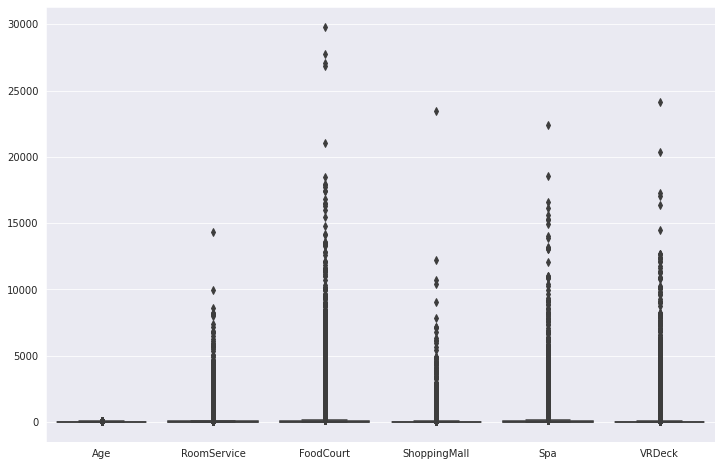

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=variaveis_numericas)

<AxesSubplot:>

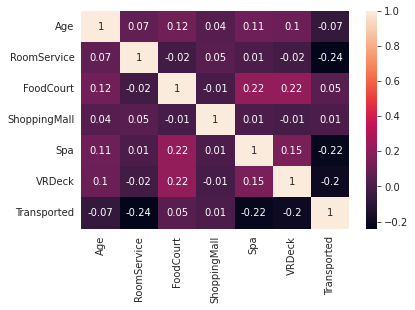

In [20]:
sns.heatmap(spaceship_analise.corr().round(2),annot=True)

# Feature Engineering

In [99]:
spaceship_analise

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# 1 - ML Aleatório - Teste

In [21]:
SEED = 135

In [22]:
spaceship_copia = spaceship.copy()
spaceship_copia.dropna(inplace=True)
spaceship_copia.shape

(6606, 14)

In [23]:
x = spaceship_copia.iloc[:,:-1]
y = spaceship_copia.iloc[:,-1]

In [24]:
df = pd.get_dummies(x, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name'])
df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,...,Name_Zinon Oilloody,Name_Zinonon Frolestty,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size=0.25, random_state=SEED)
print(train_x.shape)
print(train_y.shape)

(4954, 11912)
(4954,)


In [26]:
comparacao_modelos = pd.DataFrame(
    {'modelos':
        ['DummyClassifier',
         'LinearSVC',
         'DecisionTreeClassifier',
         'RandomForestClassifier',
         'ExtraTreesClassifier',
         'BaggingClassifier'],
    'acuracia':
        [acuracia_modelo(DummyClassifier),
         acuracia_modelo(LinearSVC),
         acuracia_modelo(DecisionTreeClassifier),
         acuracia_modelo(RandomForestClassifier),
         acuracia_modelo(ExtraTreesClassifier),
         acuracia_modelo(BaggingClassifier)]}
    )
comparacao_modelos.sort_values(by='acuracia',ascending=False)

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 

# 2 - ML Aleatório - Preenchimento dos valores

In [ ]:
SEED = 135

In [ ]:
spaceship_2 = spaceship.copy()
spaceship_2 = spaceship_2.fillna(0)

x = spaceship_2.iloc[:,:-1]
y = spaceship_2.iloc[:,-1]

In [ ]:
df = pd.get_dummies(x, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name'])
df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size=0.25, random_state=SEED)
print(train_x.shape)
print(train_y.shape)

(6519, 15054)
(6519,)


In [ ]:
comparacao_modelos = pd.DataFrame(
    {'modelos':
        ['DummyClassifier',
         'LinearSVC',
         'DecisionTreeClassifier',
         'RandomForestClassifier',
         'ExtraTreesClassifier',
         'BaggingClassifier'],
    'acuracia':
        [acuracia_modelo(DummyClassifier),
         acuracia_modelo(LinearSVC),
         acuracia_modelo(DecisionTreeClassifier),
         acuracia_modelo(RandomForestClassifier),
         acuracia_modelo(ExtraTreesClassifier),
         acuracia_modelo(BaggingClassifier)]}
    )
comparacao_modelos.sort_values(by='acuracia',ascending=False)

/home/franciscofoz/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,modelos,acuracia
3,RandomForestClassifier,78.6
5,BaggingClassifier,77.4
4,ExtraTreesClassifier,75.6
2,DecisionTreeClassifier,74.9
1,LinearSVC,49.2
0,DummyClassifier,47.0


In [ ]:
def metricas_classificao(nome_modelo,predicao,auc):

  metricas = classification_report(y_teste, predicao,output_dict=True)
  metricas = pd.DataFrame(metricas)
  df_metricas = pd.DataFrame({'AUC': auc,
                             'F1-score_0': [metricas.iloc[2,0]],
                             'F1-score_1': [metricas.iloc[2,1]],
                             'Acurácia' :  [metricas.iloc[0,2]],
                             'Recall':     [metricas.iloc[1,2]]},
                              index=[nome_modelo])
  
  return df_metricas

# 3 - ML Aleatório - Eliminando duplicatas
